# Speed Dating with Tinder

### How to get a second date ?

In [192]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Import dataset
dataset = pd.read_csv("src\Speed_Dating_Data.csv", encoding='ISO-8859-1')
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

## Explore the dataset

In [194]:
dataset.shape

(8378, 195)

In [195]:
# Number of participants
participants = dataset['iid'].value_counts().count()
participants

551

In [196]:
# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [197]:
dataset.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [198]:
# Counting null values
dataset.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [199]:
# Number of unique participants (iid) into the experiment
nb_participant = dataset['iid'].value_counts().count()
nb_participant

551

In [200]:
# Number of wave
nb_wave = dataset['wave'].value_counts().count()
nb_wave

21

### Set category name for each number in the dataset

In [201]:
# Female = 0, Male = 1
dataset['gender'] = dataset['gender'].map({ 0 : "Female", 1 : "Male"})

In [202]:
# Match = 1, No match = 0
dataset['match'] = dataset['match'].apply(lambda x: 'Matched' if x == 1 else 'Not Matched')

In [203]:
dataset["condtn"] = dataset["condtn"].apply(lambda x : "limited_choice" if x==1 else "extensive_choice")

In [204]:
dataset["goal"] = dataset["goal"].apply(lambda x : "Seemed like a fun night out" if x ==1 
                                    else("To meet new people" if x ==2 
                                    else( "To get a date" if x == 3 
                                    else("Looking for a serious relationship" if x==4 
                                    else("To say I did it" if x ==5 
                                    else "Other"
                                            )))))

In [205]:
dataset["date"] = dataset["date"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [206]:
dataset["go_out"] = dataset["go_out"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [207]:
dataset["length"] = dataset["length"].apply(lambda x : "Too litlle" if x ==1 
                                    else("Too much" if x ==2 
                                    else "Just Right"
                                            ))

In [208]:
dataset["numdat_2"] = dataset["numdat_2"].apply(lambda x : "Too few" if x ==1 
                                    else("Too many" if x ==2 
                                    else "Just Right"
                                            ))

In [209]:
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,limited_choice,1,10,7,NaN,4,1,11.0,Not Matched,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,limited_choice,1,10,7,NaN,3,2,12.0,Not Matched,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,limited_choice,1,10,7,NaN,10,3,13.0,Matched,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,

In [210]:
dataset.shape

(8378, 195)

In [211]:
# For enlarge graphic
sns.set(rc = {'figure.figsize':(15,8)})

### Let's do some graphs

Text(0.5, 1.0, 'Gender of participants')

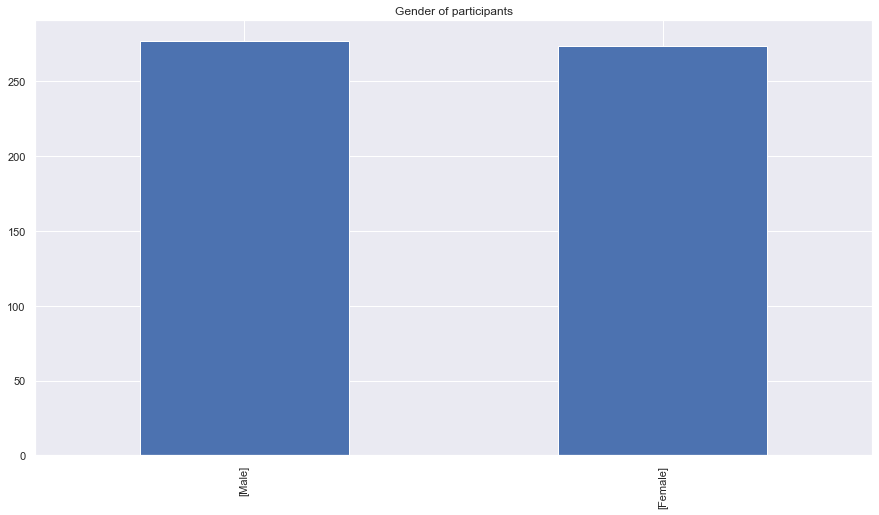

In [212]:
dataset.groupby(['iid'])['gender'].unique().value_counts().plot(kind="bar").set_title('Gender of participants')

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64


Text(0.5, 1.0, 'Age distribution')

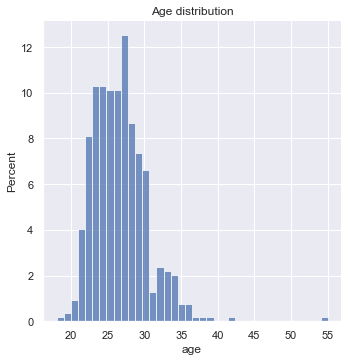

In [213]:
print(dataset['age'].describe())
age = dataset.groupby(['iid'])['age'].mean()
sns.displot(age, stat='percent')
plt.title("Age distribution")

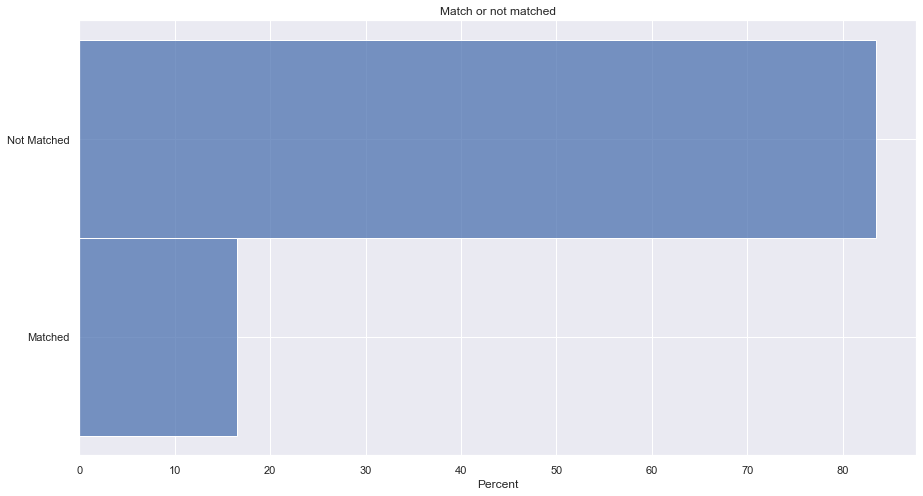

In [214]:
match = sns.histplot(dataset, y= 'match',stat='percent', discrete=True)
plt.setp(match,ylabel = '')
plt.title("Match or not matched")
plt.show()

In [216]:
# race of partner :
dataset['race'] = dataset['race'].map({ 1 : "Black/African",
                                        2 : "European/Caucasian",
                                        3 : "Latino/Hispanic",
                                        4 : "Asian/Pacific Islander/Asian",
                                        5 : "Native",
                                        6 : "Other"})

In [217]:
pd.set_option('display.max_rows',10)
dataset_ind = dataset.groupby('iid')[['gender', 'age', 'race', 'wave',
                        'attr1_1','sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                        'attr4_1','sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
                        'attr2_1','sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1' ]].head(1).reset_index(drop=True)

[Text(0.5, 1.0, 'the frequency table of the different race')]

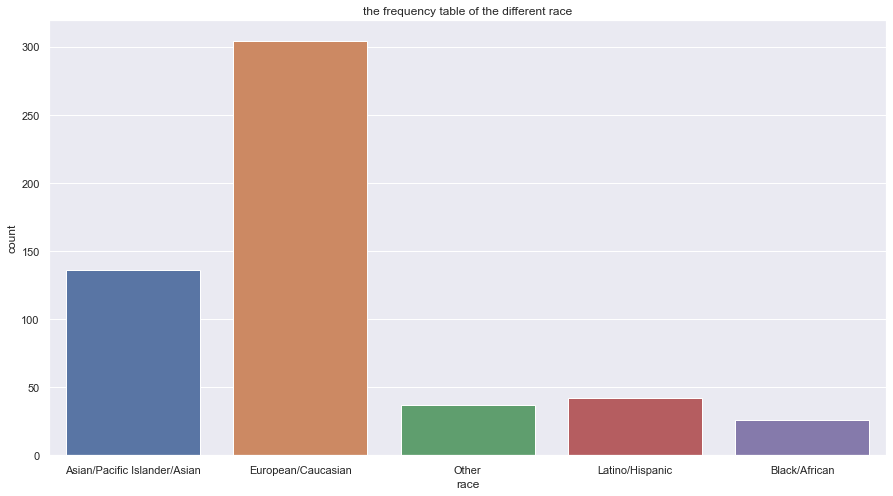

In [218]:
sns.countplot(data = dataset_ind, x = 'race').set(title = "the frequency table of the different race")

### Some statistics before the date

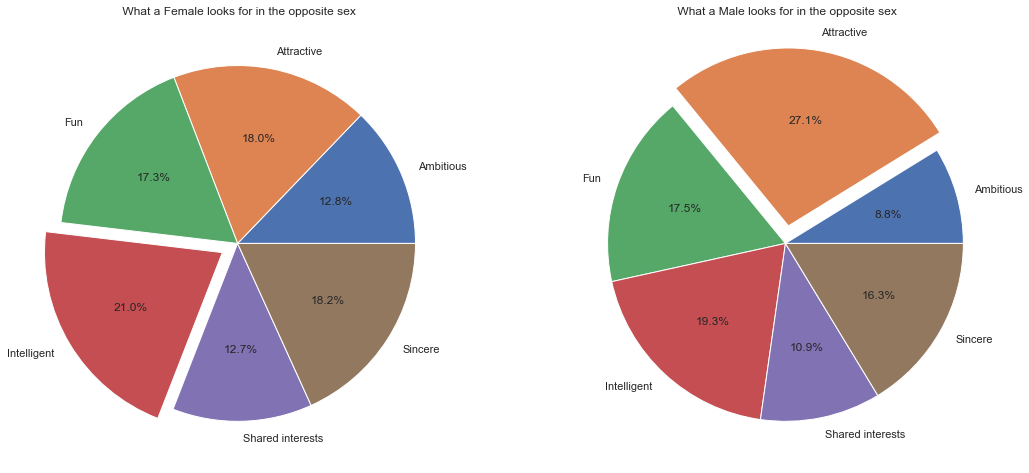

In [219]:
# search in the opposite sex
look = dataset_ind.groupby(['gender'])[['attr1_1','sinc1_1', 'intel1_1',
                                     'fun1_1', 'amb1_1', 'shar1_1']].mean().reset_index()
data = pd.pivot_table(look, values = ['attr1_1','sinc1_1', 'intel1_1',
                                     'fun1_1', 'amb1_1', 'shar1_1'], columns = 'gender')
labels = ['Ambitious','Attractive', 'Fun', 'Intelligent','Shared interests','Sincere']
plt.figure(figsize=(18,18))
plt.subplot(221)
plt.pie(data['Female'] ,labels = labels, explode = (0, 0, 0, 0.1 ,0, 0), autopct='%1.1f%%')
plt.title(" What a Female looks for in the opposite sex")
# look for in the opposite sex
plt.subplot(222)
plt.pie(data['Male'] ,labels = labels, explode = (0, 0.1, 0, 0,0, 0), autopct='%1.1f%%')
plt.title(" What a Male looks for in the opposite sex")
plt.show()

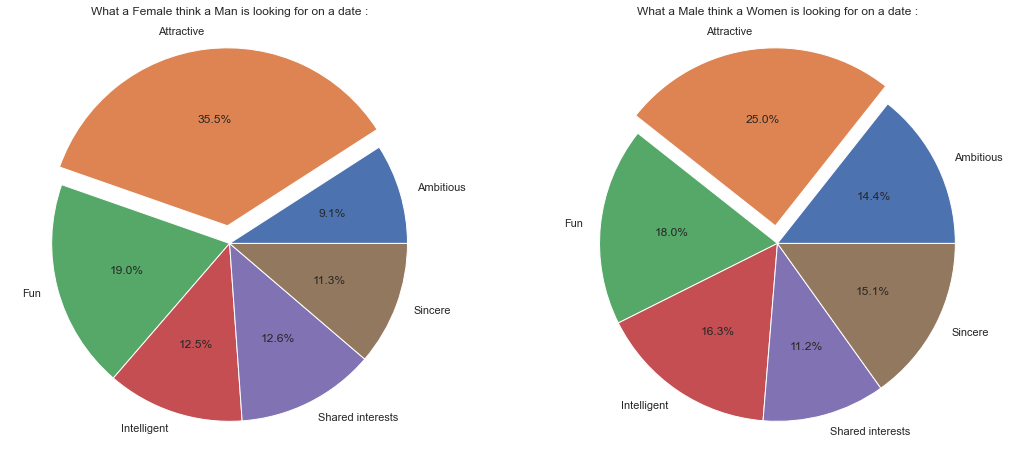

In [220]:
# What do you think the opposite sex looks for in a date
think_other_date = dataset_ind.groupby(['gender'])[['attr2_1','sinc2_1', 'intel2_1',
                                                'fun2_1', 'amb2_1', 'shar2_1']].mean().reset_index()
data_o_date = pd.pivot_table(think_other_date , values = ['attr2_1','sinc2_1', 'intel2_1',
                                                'fun2_1', 'amb2_1', 'shar2_1'], columns = 'gender')

labels = ['Ambitious','Attractive', 'Fun', 'Intelligent','Shared interests','Sincere']
plt.figure(figsize=(18,18))
plt.subplot(221)
plt.pie(data_o_date['Female'] ,labels = labels, explode = (0, 0.1, 0, 0 ,0, 0), autopct='%1.1f%%')
plt.title("What a Female think a Man is looking for on a date :")
# look for in the opposite sex
plt.subplot(222)
plt.pie(data_o_date['Male'] ,labels = labels, explode = (0, 0.1, 0, 0,0, 0), autopct='%1.1f%%')
plt.title("What a Male think a Women is looking for on a date :")
plt.show()

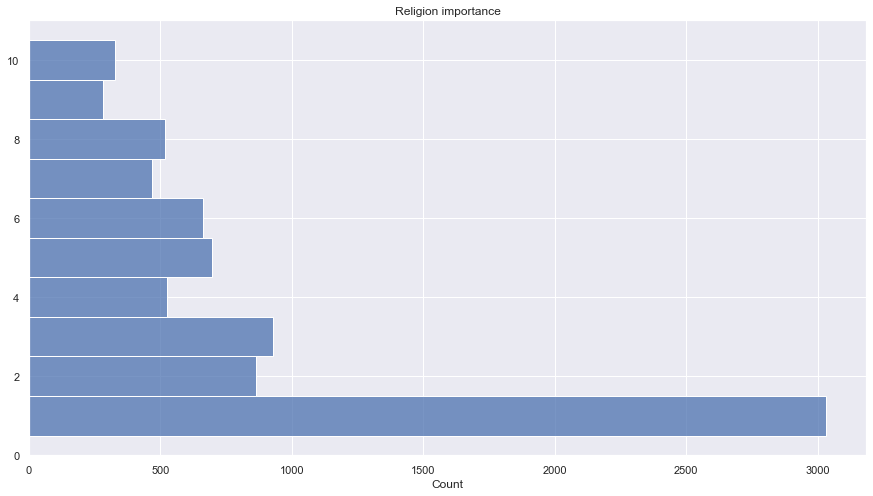

In [221]:
imprelig = sns.histplot(dataset, y= 'imprelig',stat='count', discrete=True)
plt.setp(imprelig,ylabel = '')
plt.title("Religion importance")
plt.show()

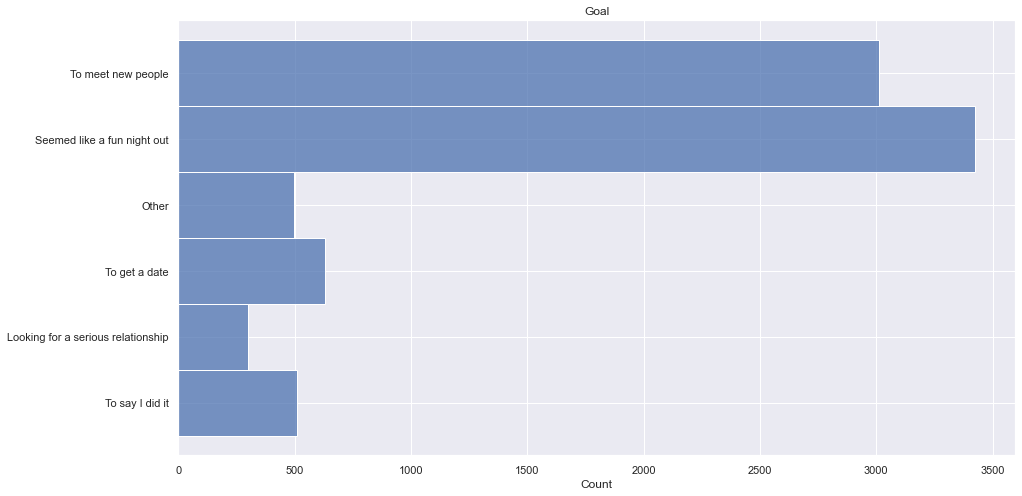

In [222]:
goal = sns.histplot(dataset, y= 'goal',stat='count', discrete=True)
plt.setp(goal,ylabel = '')
plt.title("Goal")
plt.show()

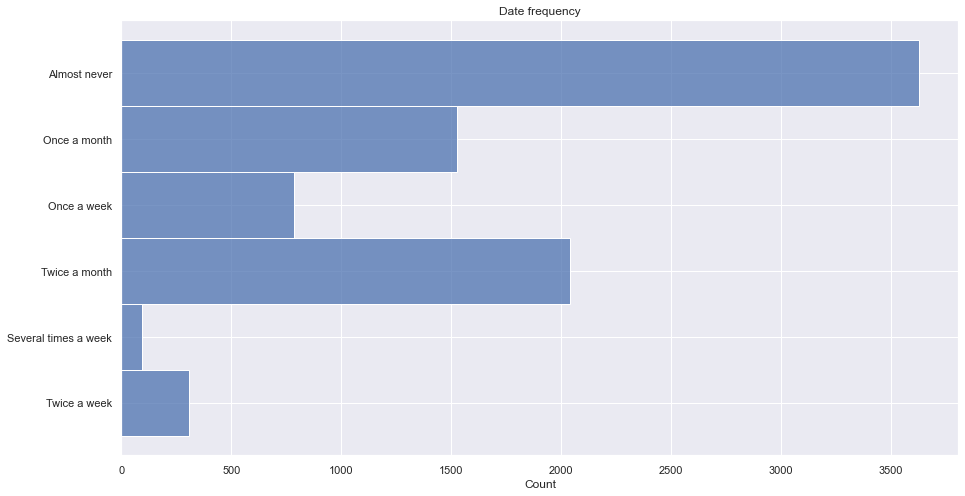

In [223]:
date = sns.histplot(dataset, y= 'date',stat='count', discrete=True)
plt.setp(date,ylabel = '')
plt.title("Date frequency")
plt.show()

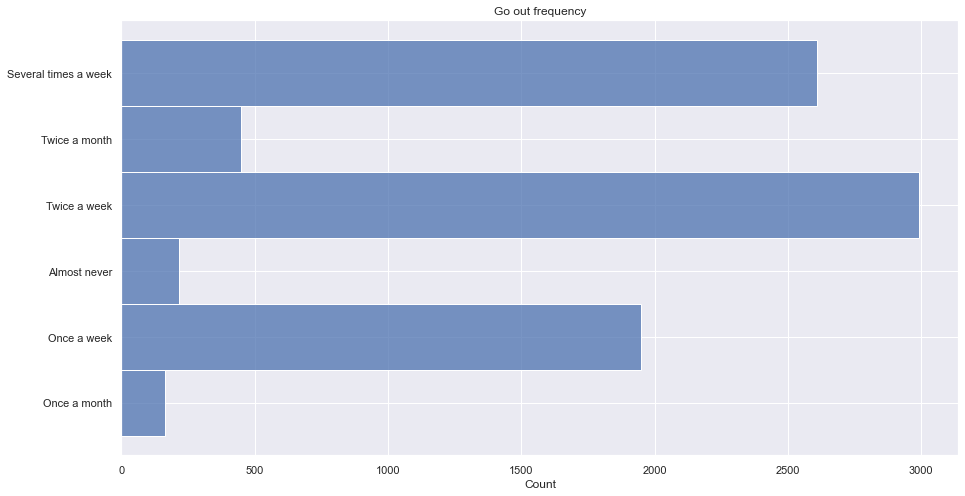

In [224]:
go_out = sns.histplot(dataset, y= 'go_out',stat='count', discrete=True)
plt.setp(go_out,ylabel = '')
plt.title("Go out frequency")
plt.show()

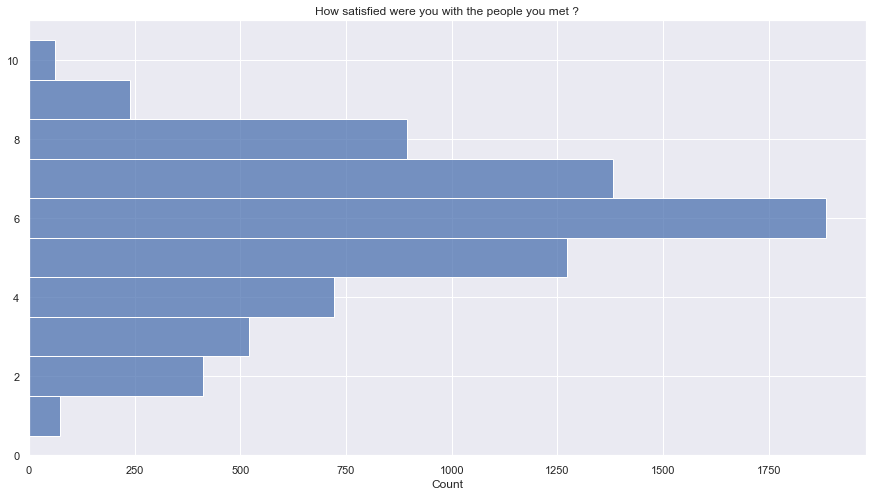

In [225]:
satis_2 = sns.histplot(dataset, y= 'satis_2',stat='count', discrete=True)
plt.setp(satis_2,ylabel = '')
plt.title("How satisfied were you with the people you met ?")
plt.show()

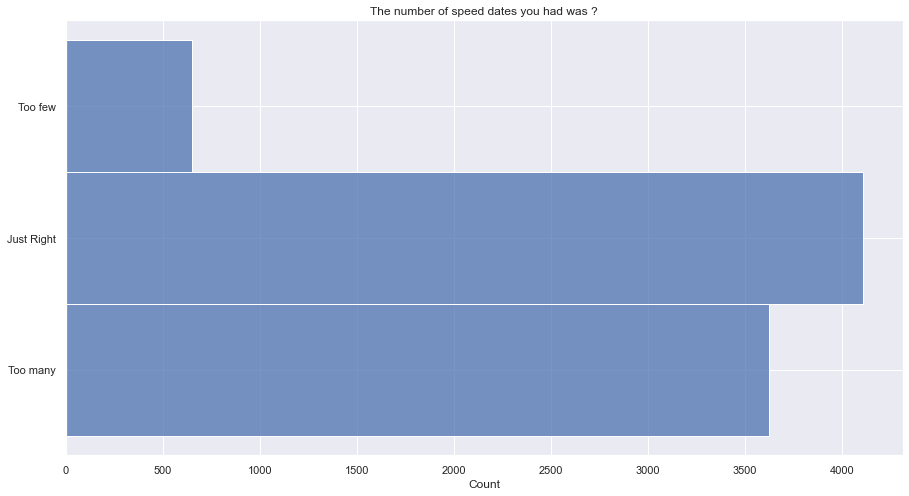

In [226]:
numdat_2 = sns.histplot(dataset, y= 'numdat_2',stat='count', discrete=True)
plt.setp(numdat_2,ylabel = '')
plt.title("The number of speed dates you had was ?")
plt.show()

## Focus on matches

In [227]:
mask_matched = dataset["match"] == "Matched"

In [228]:
data_matched = dataset.loc[mask_matched,:]

In [229]:
data_matched.shape

(1380, 195)

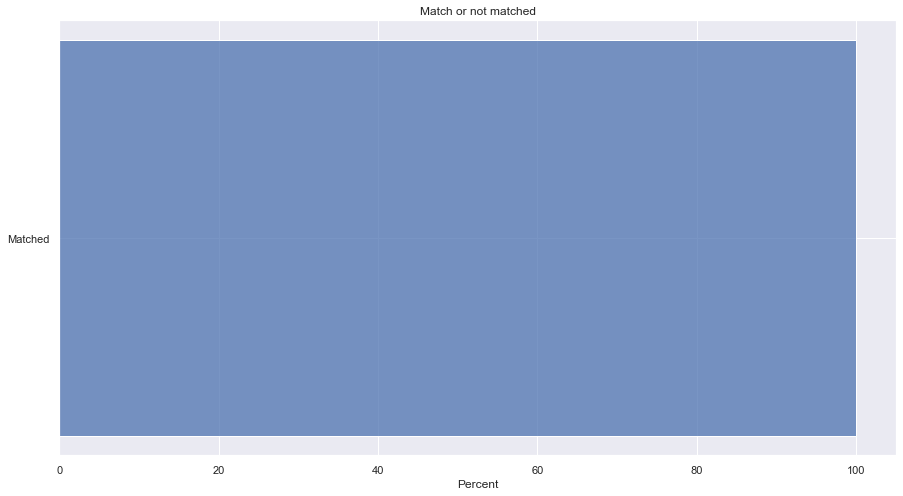

In [241]:
# Just to check
fig1 = sns.histplot(data_matched, y= 'match',stat='percent', discrete=True)
plt.setp(fig1,ylabel = '')
plt.title("Match or not matched")
plt.show()

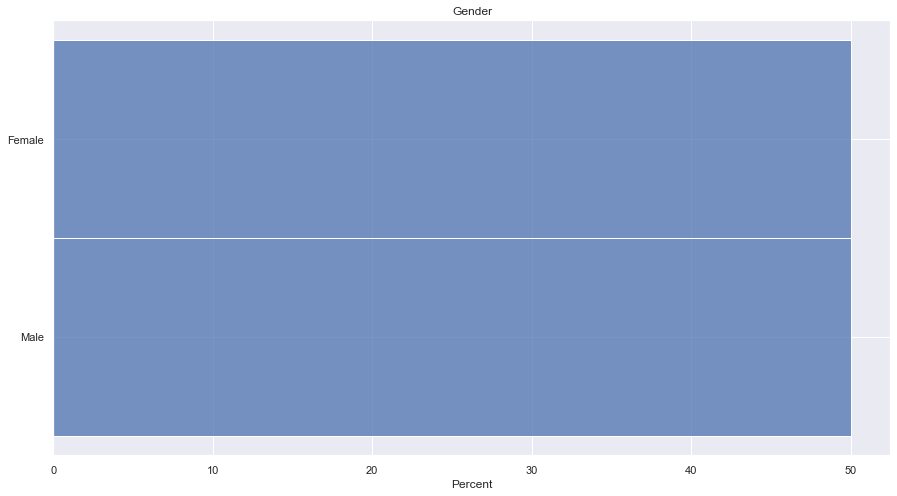

In [240]:
fig2 = sns.histplot(data_matched, y= 'gender',stat='percent', discrete=True)
plt.setp(fig2,ylabel = '')
plt.title("Gender")
plt.show()

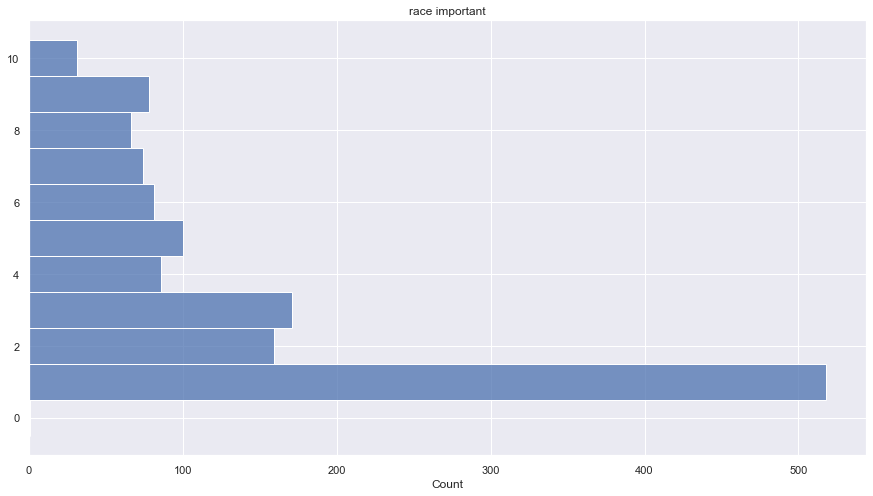

In [232]:
fig3 = sns.histplot(data_matched, y= 'imprace',stat='count', discrete=True)
plt.setp(fig3,ylabel = '')
plt.title("race important")
plt.show()

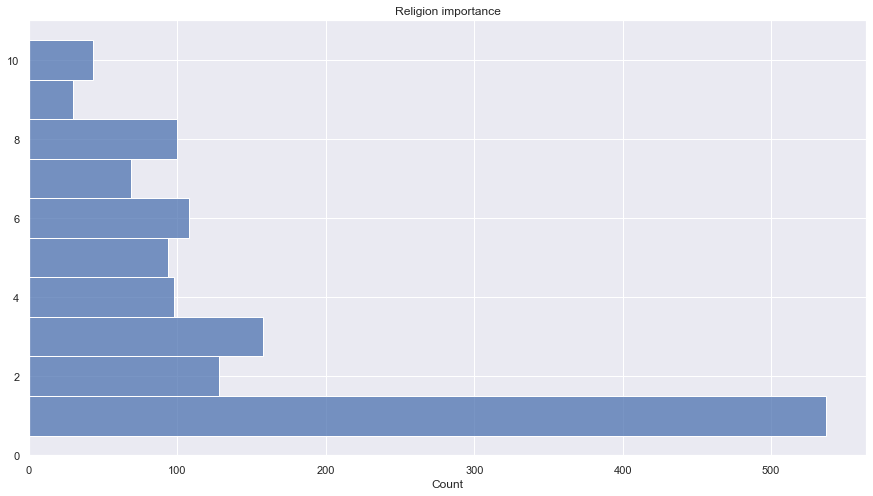

In [233]:
fig4 = sns.histplot(data_matched, y= 'imprelig',stat='count', discrete=True)
plt.setp(fig4,ylabel = '')
plt.title("Religion importance")
plt.show()

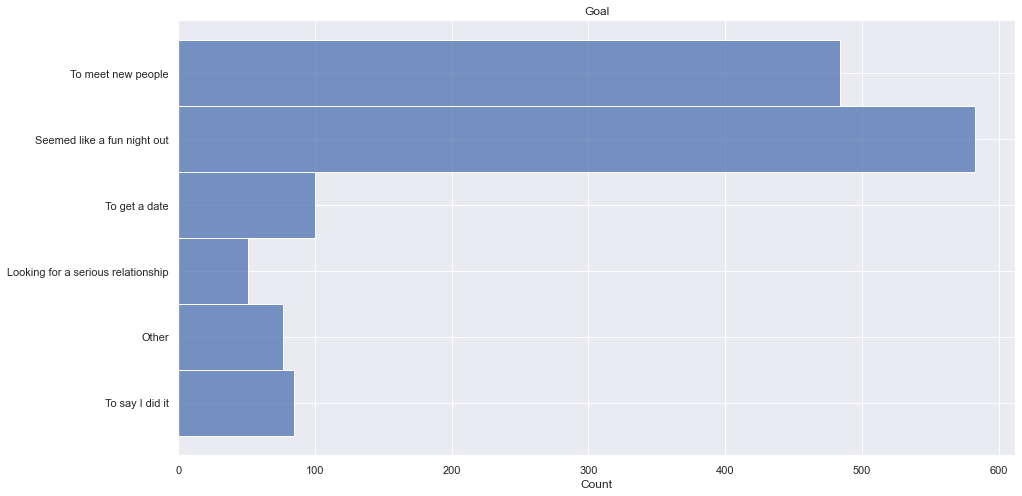

In [234]:
fig5 = sns.histplot(data_matched, y= 'goal',stat='count', discrete=True)
plt.setp(fig5,ylabel = '')
plt.title("Goal")
plt.show()

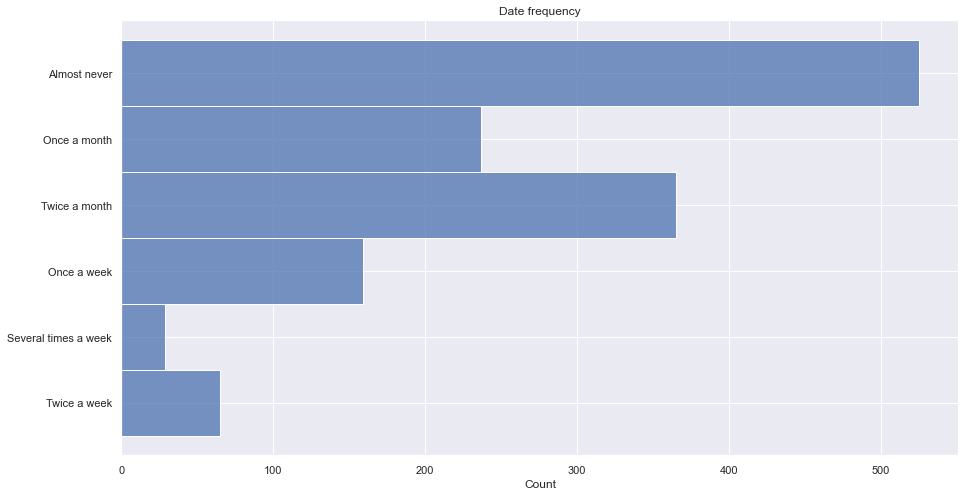

In [235]:
fig6 = sns.histplot(data_matched, y= 'date',stat='count', discrete=True)
plt.setp(fig6,ylabel = '')
plt.title("Date frequency")
plt.show()

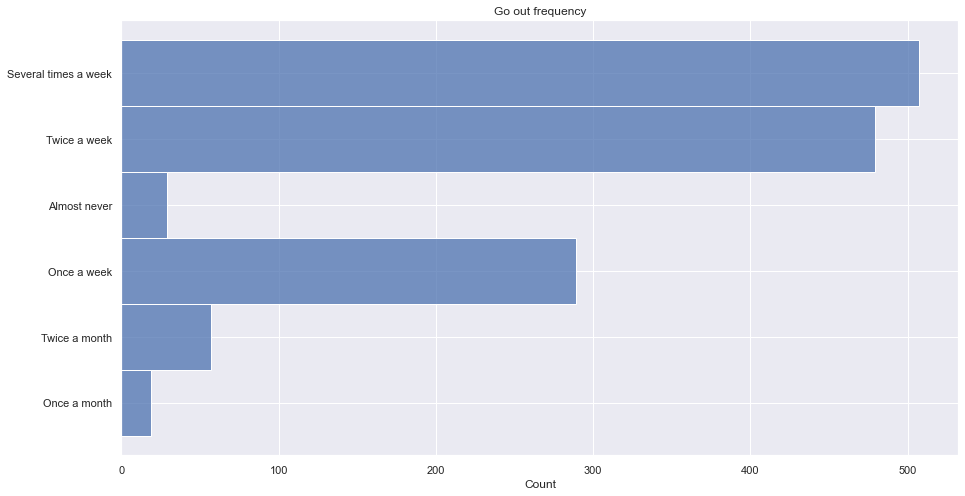

In [236]:
fig7 = sns.histplot(data_matched, y= 'go_out',stat='count', discrete=True)
plt.setp(fig7,ylabel = '')
plt.title("Go out frequency")
plt.show()

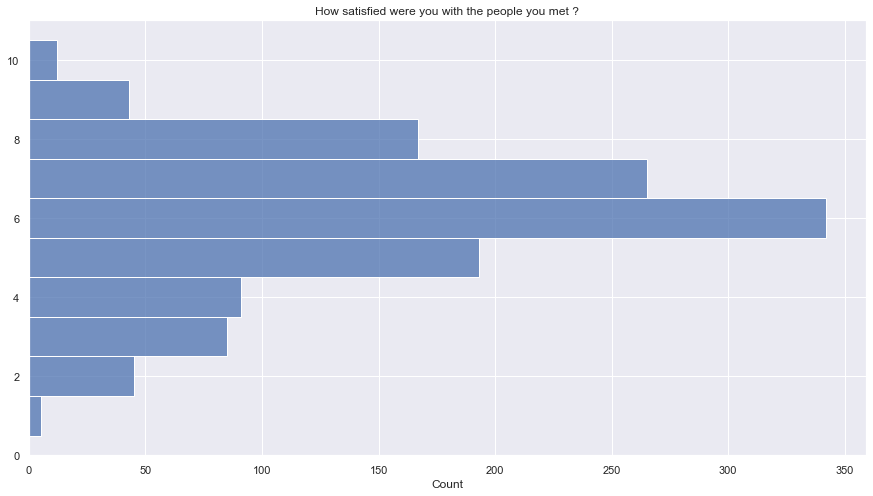

In [237]:
fig8 = sns.histplot(data_matched, y= 'satis_2',stat='count', discrete=True)
plt.setp(fig8,ylabel = '')
plt.title("How satisfied were you with the people you met ?")
plt.show()

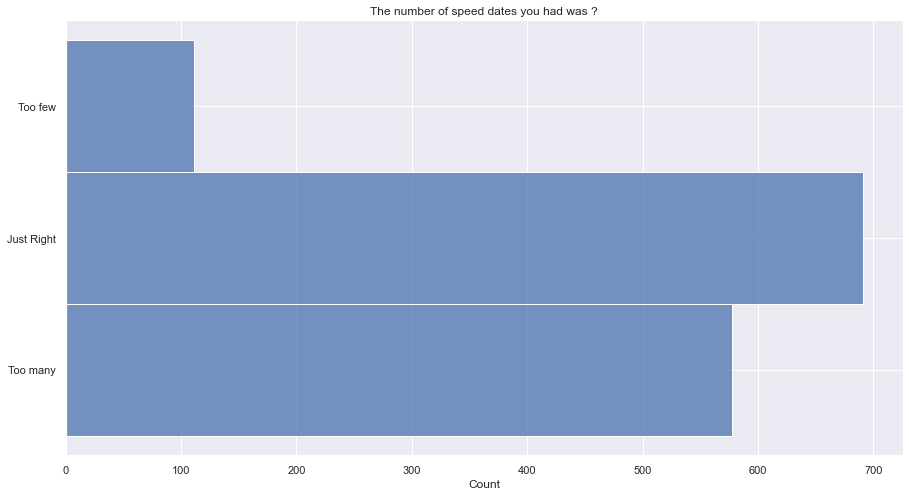

In [238]:
fig9 = sns.histplot(data_matched, y= 'numdat_2',stat='count', discrete=True)
plt.setp(fig9,ylabel = '')
plt.title("The number of speed dates you had was ?")
plt.show()

### Here are some personality points to know if you will get your second date !